<a href="https://colab.research.google.com/github/Thiru08V/CS19P18_DLC-LAB_210701290/blob/main/Deep_Learning_Project_Fake_News_Detection_Using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas matplotlib seaborn tensorflow

In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

In [ ]:
# Step 2: Load Dataset
from google.colab import files
uploaded = files.upload()  # Upload the dataset CSV file

Saving train.csv to train.csv


In [ ]:
df = pd.read_csv('train.csv')  # Replace 'train.csv' with the uploaded file name
print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset loaded successfully with 5 rows and 2 columns.


In [ ]:
# Preview data
print(df.head())

                                                text  label
0       The economy is growing faster than expected.      1
1               Aliens have landed in New York City.      0
2       Scientists discovered a new cure for cancer.      1
3              The president is a robot in disguise.      0
4  This is the best time to invest in the stock m...      1


In [ ]:
# Step 3: Data Preprocessing
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 text     0
label    0
dtype: int64


In [ ]:
# Drop missing values
df.dropna(subset=['text'], inplace=True)

In [ ]:
# Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # 0 for fake, 1 for real

In [ ]:
# Tokenize and pad text
max_words = 5000
max_len = 500

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['text'])

In [ ]:
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=max_len)
y = df['label']

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Data preprocessing complete!")

Data preprocessing complete!


In [ ]:
# Step 4: Build the LSTM Model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Model built successfully!")

Model built successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Step 5: Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.5000 - loss: 0.6904 - val_accuracy: 0.0000e+00 - val_loss: 0.7105
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.6819 - val_accuracy: 0.0000e+00 - val_loss: 0.7305
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step - accuracy: 0.7500 - loss: 0.6669 - val_accuracy: 0.0000e+00 - val_loss: 0.7647
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.6509 - val_accuracy: 0.0000e+00 - val_loss: 0.8282
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step - accuracy: 0.7500 - loss: 0.6377 - val_accuracy: 0.0000e+00 - val_loss: 0.9230


In [ ]:
# Step 6: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.0000e+00 - loss: 0.9230
Test Loss: 0.9230, Test Accuracy: 0.0000


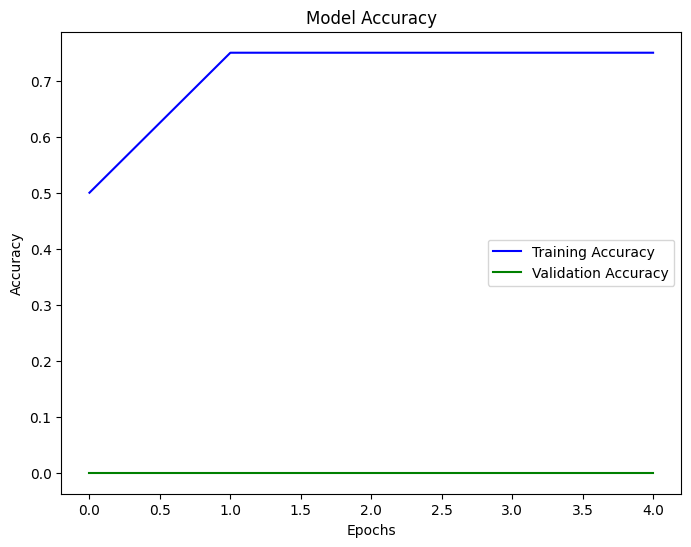

In [ ]:
# Step 7: Visualize Performance
# Accuracy Plot
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

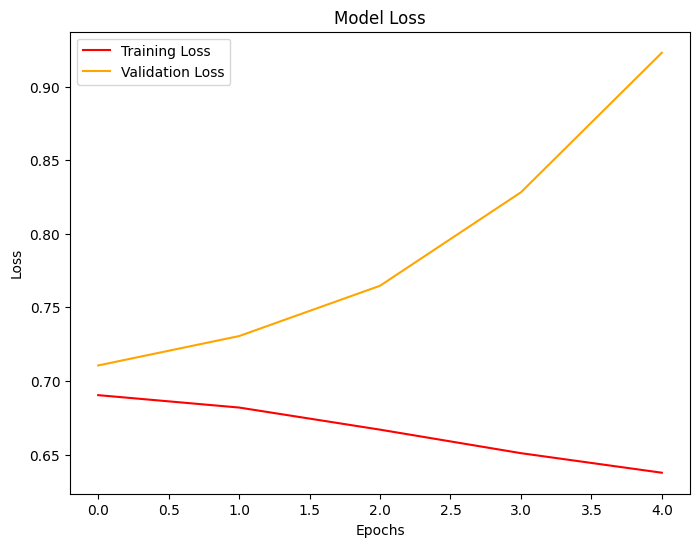

In [ ]:
# Loss Plot
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Step 8: Make Predictions
sample_text = ["The stock market is expected to rise today according to analysts."]
sample_sequence = tokenizer.texts_to_sequences(sample_text)
sample_sequence = pad_sequences(sample_sequence, maxlen=max_len)
prediction = model.predict(sample_sequence)
label = "Real" if prediction >= 0.5 else "Fake"
print(f"Prediction: {label} (Confidence: {prediction[0][0]:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
Prediction: Real (Confidence: 0.61)
